In [546]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [444]:
df = pd.read_csv('datasets/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [445]:
df.shape

(2000, 21)

In [446]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [447]:
df['price_range'].values

array([1, 2, 2, ..., 3, 0, 3], dtype=int64)

In [448]:
X = df.drop(['price_range'],axis=1)
y = df['price_range']

In [449]:
# Separación entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [450]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

C:\Users\fedeg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\fedeg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\fedeg\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\fedeg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [451]:
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [452]:
prediccion = modelo_NB.predict(X_test)

In [453]:
prediccion

array([1, 1, 3, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 3, 0,
       3, 3, 3, 3, 2, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 2, 3, 2, 2, 1, 0, 3, 2, 1, 3, 2, 0, 3, 3, 2, 3, 3, 3, 1, 1, 0,
       0, 0, 0, 3, 1, 1, 3, 3, 3, 3, 3, 3, 0, 2, 0, 0, 1, 0, 2, 3, 1, 3,
       0, 0, 3, 3, 0, 2, 0, 3, 1, 0, 1, 3, 2, 3, 3, 3, 0, 3, 0, 0, 3, 0,
       1, 0, 3, 2, 2, 3, 3, 3, 1, 0, 3, 3, 3, 2, 1, 1, 3, 3, 2, 3, 0, 0,
       0, 1, 0, 3, 3, 0, 2, 1, 3, 2, 0, 2, 0, 0, 0, 3, 3, 0, 3, 1, 3, 2,
       2, 3, 2, 0, 3, 1, 1, 2, 3, 3, 2, 3, 2, 1, 1, 3, 1, 3, 1, 3, 2, 3,
       1, 1, 2, 3, 2, 1, 0, 0, 3, 3, 1, 3, 2, 1, 3, 0, 3, 3, 0, 2, 0, 2,
       2, 0, 1, 3, 2, 3, 1, 2, 0, 3, 3, 3, 2, 1, 1, 3, 0, 3, 0, 1, 3, 0,
       1, 2, 3, 0, 2, 3, 1, 2, 3, 1, 1, 3, 1, 2, 0, 3, 1, 1, 2, 0, 1, 1,
       3, 3, 0, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 0, 2, 3, 3, 0,
       1, 0, 1, 2, 0, 3, 3, 1, 2, 0, 1, 3, 1, 3, 2, 3, 3, 3, 0, 2, 1, 3,
       3, 3, 3, 2, 3, 2, 0, 3, 3, 0, 3, 2, 0, 0, 2,

In [454]:
# Primero calculamos el accuracy general del modelo
accuracy_score(y_test, prediccion)

0.4675

In [455]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [456]:
mat = confusion_matrix(y_test, prediccion)
mat.shape

(4, 4)

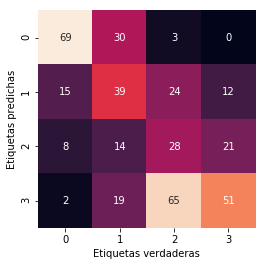

In [457]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
#xticklabels=['negativo','positivo'], yticklabels=['negativo','positivo']
plt.xlabel('Etiquetas verdaderas')
plt.ylabel('Etiquetas predichas');

### svc

In [628]:
#estandarizar
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#convertir a df
X_train_std_df = pd.DataFrame(X_train_std, index=X_train.index, columns=X_train.columns)
X_test_std_df = pd.DataFrame(X_test_std, index=X_test.index, columns=X_test.columns) 

#elijo componentes principales
pca = PCA(n_components = 17) 
X_train_pca = pca.fit_transform(X_train_std_df)
X_test_pca = pca.transform(X_test_std_df)

#modelos
svm_lin = SVC(kernel='sigmoid',degree=3,C=10, gamma='auto')
svm_rbf = SVC(kernel='rbf',C=10, gamma='auto')
svm_rbf.fit(X_train_std_df, y_train)
svm_lin.fit(X_train_std_df, y_train)

C:\Users\fedeg\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\fedeg\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\fedeg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [620]:
#Applying grid search for optimal parameters and model after k-fold validation

parameters = [{'C':[0.01,0.1,1,10,50,100,500,1000], 'kernel':['rbf'], 'gamma': [0.1,0.125,0.15,0.17,0.2]}]
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=parameters, scoring ='accuracy',cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train_pca,y_train)

best_accuracy = grid_search.best_score_
opt_param = grid_search.best_params_
print(best_accuracy)
print(opt_param)

0.834375
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [629]:
#predicciones
prediccion_svm_lin = svm_lin.predict(X_test_std_df)
prediccion_svm_rbf = svm_rbf.predict(X_test_std_df)

In [630]:
#accuracy
print(accuracy_score(y_test, prediccion_svm_lin))
print(accuracy_score(y_test, prediccion_svm_rbf))

0.8725
0.885


In [631]:
print("SVM-lin score:", svm_lin.score(X_test_std_df, y_test))
print("SVM-rbf score:", svm_rbf.score(X_test_pca, y_test))

ValueError: X.shape[1] = 17 should be equal to 20, the number of features at training time